In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [39]:
print("Number of negative values per column:")
negative_values = (df < 0).sum()
print(negative_values)


Number of negative values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [40]:
print("Number of zero values per column:")
zero_values = (df == 0).sum()
print(zero_values)

Number of zero values per column:
fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64


In [41]:
print("Dataset shape (rows, columns):")
print(df.shape)

Dataset shape (rows, columns):
(1599, 12)


In [42]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [43]:
selected_columns = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                       'density', 'pH', 'sulphates', 'alcohol']]

# Display the selected columns
print(selected_columns)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [44]:
quality_column = df[['quality']]

# Display the selected quality column
print(quality_column)

      quality
0           5
1           5
2           5
3           6
4           5
...       ...
1594        5
1595        6
1596        6
1597        5
1598        6

[1599 rows x 1 columns]


<Axes: xlabel='quality', ylabel='count'>

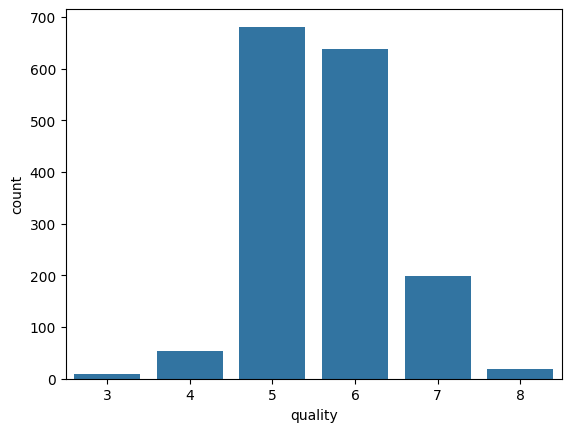

In [45]:
sns.countplot(x='quality', data=df)

<Axes: >

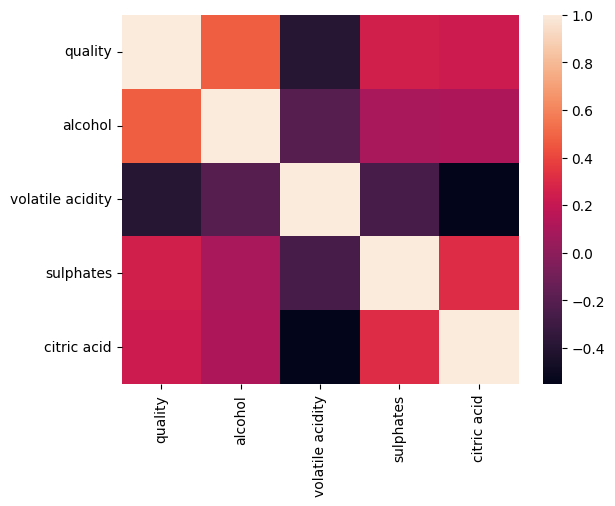

In [46]:
corr = df.corr()
idx = corr['quality'].abs().sort_values(ascending=False).index[:5]
idx_features = idx.drop('quality')
sns.heatmap(corr.loc[idx, idx])

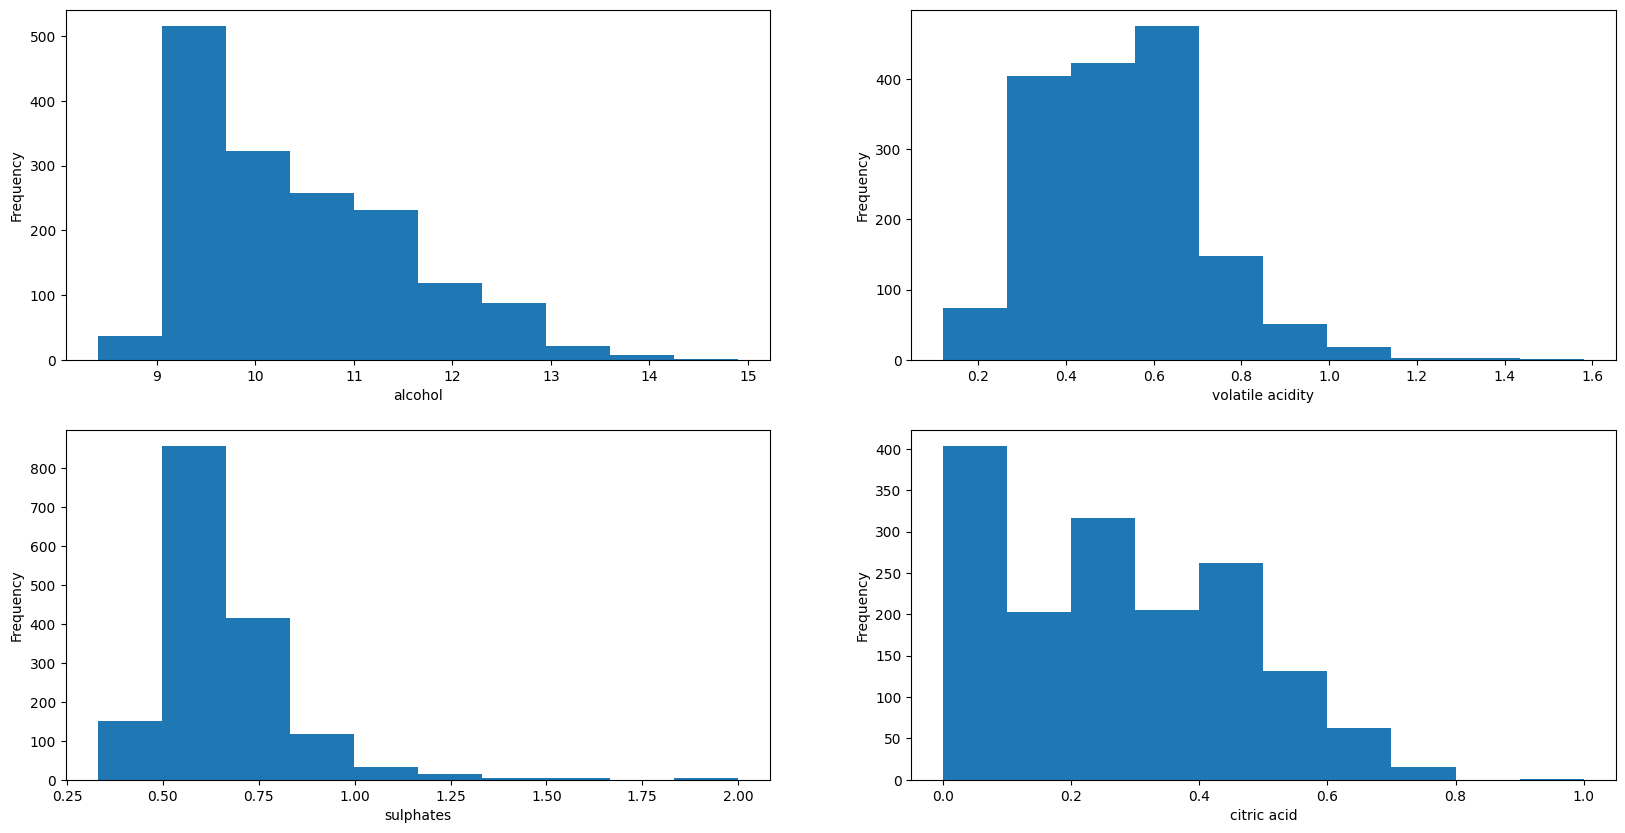

In [47]:
_, ax = plt.subplots(2, 2, figsize=(20, 10))
for var, axis in zip(idx_features, ax.flatten()):
    df[var].plot.hist(ax=axis)
    axis.set_xlabel(var)

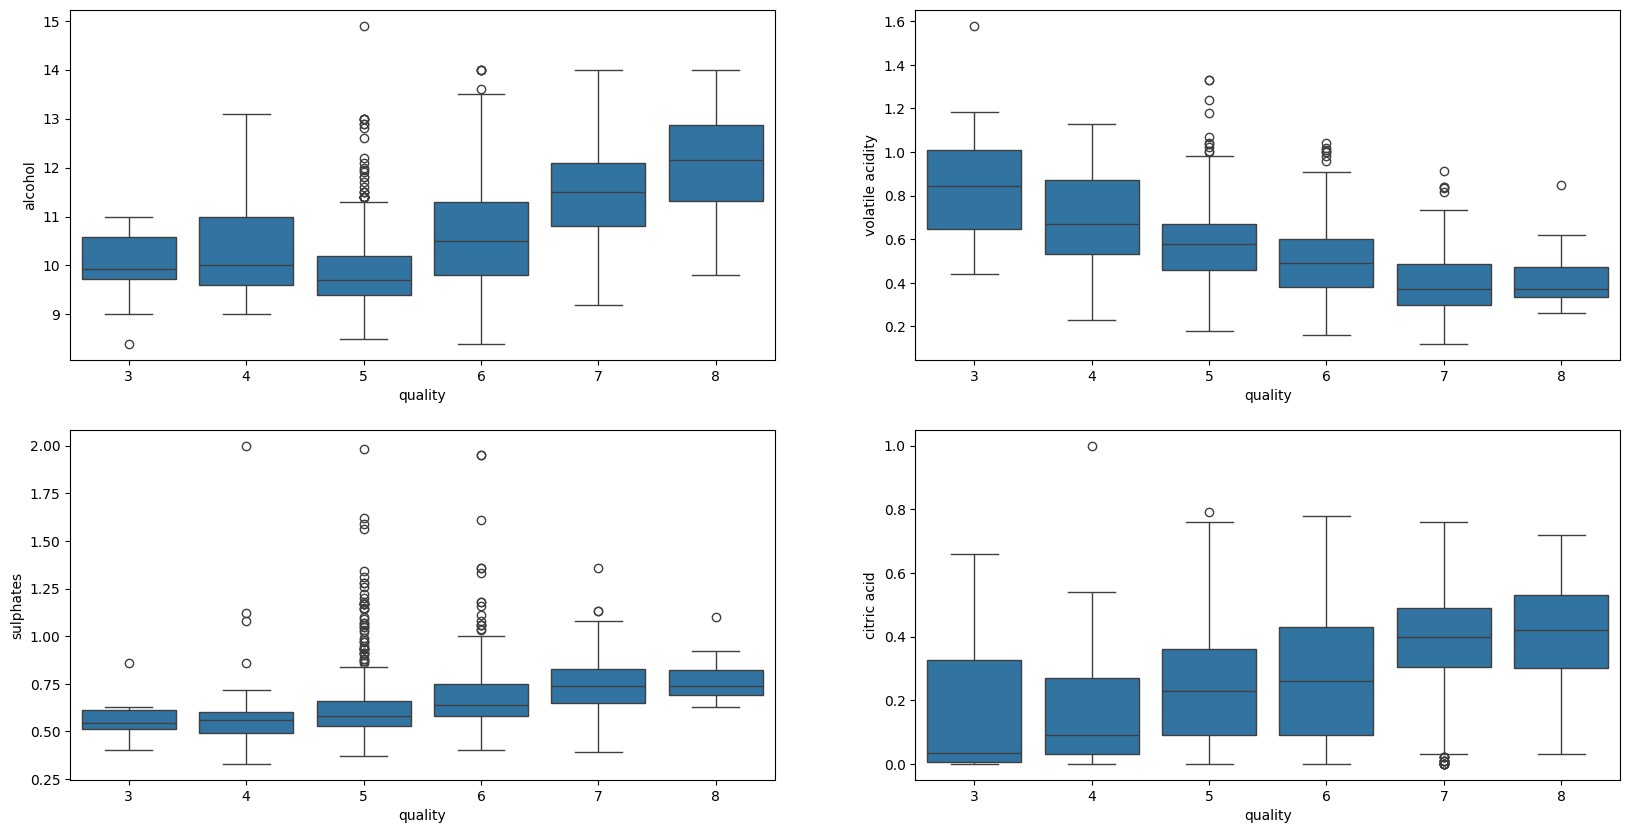

In [48]:
_, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, var in enumerate(idx.drop('quality')):
    sns.boxplot(x='quality', y=var, data=df, ax=ax.flatten()[i])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(selected_columns, quality_column, test_size=0.3, random_state=0)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(selected_columns, quality_column, test_size=0.3, random_state=0)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Train the model on the entire dataset
model.fit(selected_columns, quality_column)


LinearRegression()

In [51]:
np.random.seed(42)
features = pd.DataFrame(np.random.rand(1500, 11), columns=[f'Feature_{i}' for i in range(1, 12)])
target = pd.DataFrame(np.random.rand(1500, 1), columns=['Target'])

# Split the data
X = selected_columns
y = quality_column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.39002514396395493
R^2 Score: 0.4031803412796219


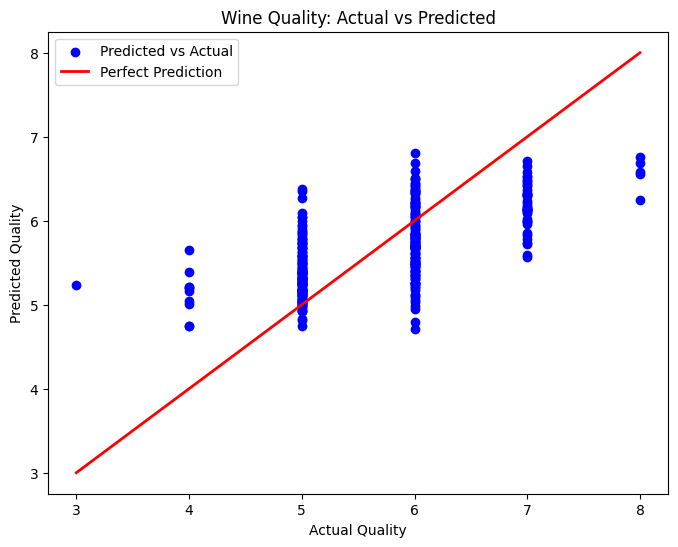

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')  # Ideal line
plt.title('Wine Quality: Actual vs Predicted')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.show()

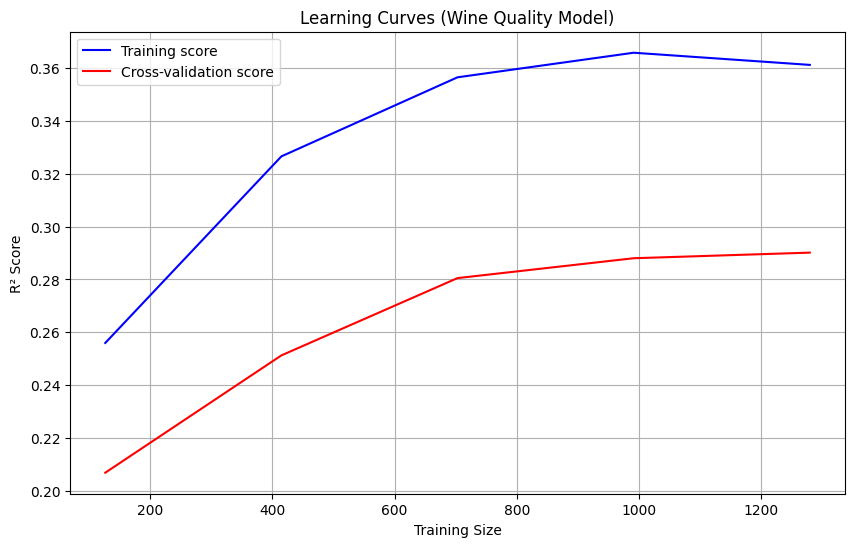

In [53]:
def plot_learning_curves(X, y, model):
    train_sizes, train_scores, cv_scores = learning_curve(model, X, y, cv=5, scoring='r2', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    cv_scores_mean = np.mean(cv_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
    plt.plot(train_sizes, cv_scores_mean, label='Cross-validation score', color='red')
    plt.xlabel('Training Size')
    plt.ylabel('R² Score')
    plt.title('Learning Curves (Wine Quality Model)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curves(X, y, model)

In [54]:
y_pred = model.predict(X_test)

# Accuracy: R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy): {r2:.4f}")

# Loss: Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Error

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² Score (Accuracy): 0.4032
Mean Squared Error (MSE): 0.3900
Mean Absolute Error (MAE): 0.5035


Top 5 Features for Low Quality Wines:
total sulfur dioxide    24.900
free sulfur dioxide     11.000
alcohol                  9.955
fixed acidity            8.360
pH                       3.398
dtype: float64

Top 5 Features for Mid Quality Wines:
total sulfur dioxide    46.754297
free sulfur dioxide     15.935710
alcohol                 10.406811
fixed acidity            8.316550
pH                       3.311063
dtype: float64

Top 5 Features for High Quality Wines:
total sulfur dioxide    33.444444
free sulfur dioxide     13.277778
alcohol                 12.094444
fixed acidity            8.566667
pH                       3.267222
dtype: float64


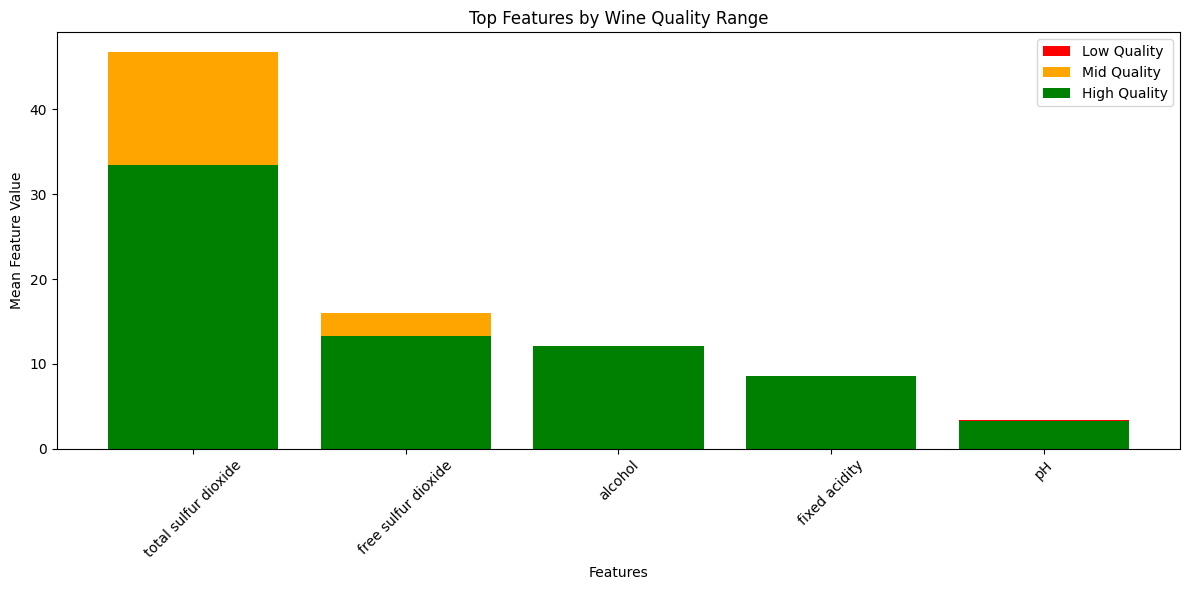

In [55]:
# Define quality ranges
low_quality = df[df['quality'] <= 3]
mid_quality = df[(df['quality'] >= 4) & (df['quality'] <= 7)]
high_quality = df[df['quality'] >= 8]

# Calculate mean feature values for each quality range
low_quality_means = low_quality.mean()
mid_quality_means = mid_quality.mean()
high_quality_means = high_quality.mean()

# Drop the 'quality' column from the means
low_quality_means = low_quality_means.drop('quality')
mid_quality_means = mid_quality_means.drop('quality')
high_quality_means = high_quality_means.drop('quality')

# Sort feature means for each range and get top 5
low_top_features = low_quality_means.sort_values(ascending=False).head(5)
mid_top_features = mid_quality_means.sort_values(ascending=False).head(5)
high_top_features = high_quality_means.sort_values(ascending=False).head(5)

# Display top features
print("Top 5 Features for Low Quality Wines:")
print(low_top_features)

print("\nTop 5 Features for Mid Quality Wines:")
print(mid_top_features)

print("\nTop 5 Features for High Quality Wines:")
print(high_top_features)

# Bar plots for visualization
plt.figure(figsize=(12, 6))
plt.bar(low_top_features.index, low_top_features.values, color='red', label='Low Quality')
plt.bar(mid_top_features.index, mid_top_features.values, color='orange', label='Mid Quality')
plt.bar(high_top_features.index, high_top_features.values, color='green', label='High Quality')
plt.title('Top Features by Wine Quality Range')
plt.ylabel('Mean Feature Value')
plt.xlabel('Features')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
